## Intelligent Student Query Advisor and FAQ Enhancer

### Project Outline :

* Project Introduction (Overview & Problem Statement)
* Data Description (Question & Database Information)
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Machine Learning Models
* Model Evaluation
* Model Interpretability


### Overview :
This project is designed to build an end-to-end machine learning pipeline that efficiently processes student queries, categorizes them, predicts key service metrics, and uncovers hidden patterns in the data. By integrating both supervised and unsupervised learning techniques along with a robust database, the project aims to improve query resolution, enhance support services, and provide valuable insights for decision-makers

### Problem Statement :

Educational institutions often receive a high volume of student queries covering diverse topics such as academics, finances, and technical issues. Managing and responding to these queries efficiently is crucial for enhancing student satisfaction and administrative productivity. This project aims to develop a machine learning model to classify, predict, and analyze student queries while uncovering trends and improving decision-making processes—all within a structured Jupyter Notebook environment.

**Question :** The University of Excellence is looking to modernize its student support system. The administration wants to implement an automated system that processes student queries submitted via an online portal. Your organization has collected historical data comprising student questions, query categories, response times, satisfaction ratings, and response flag. The aim is to design an end-to-end pipeline that will not only predict relevant answers based on past interactions but also analyze emerging trends from new queries.

You're provided with a CSV file capturing student queries along with metadata such as Query ID, Timestamp, Student ID, Query Text, Query Category, Satisfaction Score, Response Time, Resolved Flag.

In [77]:
# Data Handling & Processing
import pandas as pd # panels for data manipulation and analysis
import numpy as np # numerical computing library

In [78]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px  # For interactive visualizations

In [79]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score)

In [80]:
# Model Interpretability Alternative
from lime.lime_tabular import LimeTabularExplainer

In [81]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [82]:
# Load the dataset
stu_query = pd.read_csv("query_data.csv")
print("Dataset Loaded Successfully.")

Dataset Loaded Successfully.


In [83]:
stu_query # Display all the columns in the dataset

,Query_ID,Timestamp,Student_ID,Query_Text,Query_Category,Satisfaction_Score,Response_Time,Resolved_Flag
0,1,01-04-2025 09:05,STU10567,What is the deadline for fee payment?,Technical,4.6,17,No
1,2,01-04-2025 09:10,STU10568,How can I get a transcript?,Administrative,3.9,10,No
2,3,01-04-2025 09:15,STU10569,I need help with course selection.,Administrative,4.4,22,Yes
3,4,01-04-2025 09:20,STU10570,How can I get a transcript?,Administrative,3.7,40,Yes
4,5,01-04-2025 09:25,STU10571,My grade has not been updated.,Academic,4.8,44,No
...,...,...,...,...,...,...,...,...
1495,1496,06-04-2025 13:40,STU12062,"I forgot my password, need assistance.",Financial,3.4,29,No
1496,1497,06-04-2025 13:45,STU12063,When is the semester starting?,Administrative,3.4,36,Yes
1497,1498,06-04-2025 13:50,STU12064,Website shows error 404.,Financial,3.4,27,No
1498,1499,06-04-2025 13:55,STU12065,How can I get a transcript?,Academic,4.9,31,No


In [84]:
stu_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Query_ID            1500 non-null   int64  
 1   Timestamp           1500 non-null   object 
 2   Student_ID          1500 non-null   object 
 3   Query_Text          1500 non-null   object 
 4   Query_Category      1500 non-null   object 
 5   Satisfaction_Score  1500 non-null   float64
 6   Response_Time       1500 non-null   int64  
 7   Resolved_Flag       1500 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


### Data Preprocessing (Cleaning the data)

Data preprocessing ( cleaning ) is a crucial step to ensure the dataset is clean and ready for analysis and modeling. In this project, preprocessing involved:

- **Handling Missing Values and Duplicates:** Checked for any missing data and removed duplicate records to maintain data quality.
- **Encoding Categorical Variables:** Converted text-based categories (like `Query_Category` and `Resolved_Flag`) into numerical values using label encoding, making them suitable for machine learning algorithms.
- **Feature Scaling:** Standardized numerical features such as `Response_Time` and `Satisfaction_Score` so that all values are on a similar scale, improving model performance.

These steps help create a consistent and reliable dataset for further analysis and machine learning tasks.

In [85]:
# Check for missing values and duplicates
print("Missing Values:\n", stu_query.isnull().sum())
stu_query.drop_duplicates(inplace=True)
print("Data cleaned successfully!")

# Encode categorical variables
encoder = LabelEncoder()
stu_query["Query_Category"] = encoder.fit_transform(stu_query["Query_Category"])
stu_query["Resolved_Flag"] = encoder.fit_transform(stu_query["Resolved_Flag"])

# Scale numeric features
scaler = StandardScaler()
stu_query[["Response_Time", "Satisfaction_Score"]] = scaler.fit_transform(stu_query[["Response_Time", "Satisfaction_Score"]])
print("Preprocessing complete!")

Missing Values:
 Query_ID              0
Timestamp             0
Student_ID            0
Query_Text            0
Query_Category        0
Satisfaction_Score    0
Response_Time         0
Resolved_Flag         0
dtype: int64
Data cleaned successfully!
Preprocessing complete!


### Exploratory Data Analysis (EDA)

#### Interactive Histogram of Satisfaction Scores

#### What is a Histogram?

A histogram is a type of bar plot that shows the distribution of a numerical variable by dividing the data into bins (intervals) and counting how many values fall into each bin. It helps you quickly see patterns such as where most values are concentrated, the spread of the data, and if there are any outliers.

- **X-axis:** Represents the range of values (divided into bins).
- **Y-axis:** Shows the frequency (count) of values in each bin.

Histograms are useful for understanding the overall shape and variability of your data.

In [86]:
fig = px.histogram(stu_query, x="Satisfaction_Score", nbins=10, title="Distribution of Satisfaction Scores", labels={"Satisfaction_Score": "Satisfaction Score"})
fig.show()

#### Frequency of Query Categories

#### What is a Bar Chart?

A bar chart is a graph that uses rectangular bars to represent and compare the frequency, count, or value of different categories. Each bar's length or height is proportional to the value it represents.

- **X-axis:** Shows the categories (e.g., types of queries).
- **Y-axis:** Shows the values (e.g., number of queries in each category).

Bar charts are useful for visualizing and comparing data across different groups or categories.

In [87]:
df = stu_query
fig = px.bar(df, x="Query_Category", color="Query_Category", title="Frequency of Queries per Category", labels={"Query_Category": "Query Category"})
fig.show()

#### Box Plot for Response Time by Query Category

#### What is a Box Plot?

A box plot (or box-and-whisker plot) is a graphical tool used to display the distribution of a dataset. It shows the median, quartiles, and possible outliers in your data.

- **Box:** Represents the middle 50% of the data (from the first quartile (Q1) to the third quartile (Q3)).
- **Line inside the box:** Shows the median (middle value).
- **Whiskers:** Extend from the box to the smallest and largest values within 1.5 times the interquartile range (IQR).
- **Dots (if any):** Indicate outliers, which are values outside the whiskers.

Box plots are useful for comparing distributions between groups and spotting outliers or skewness in the data.

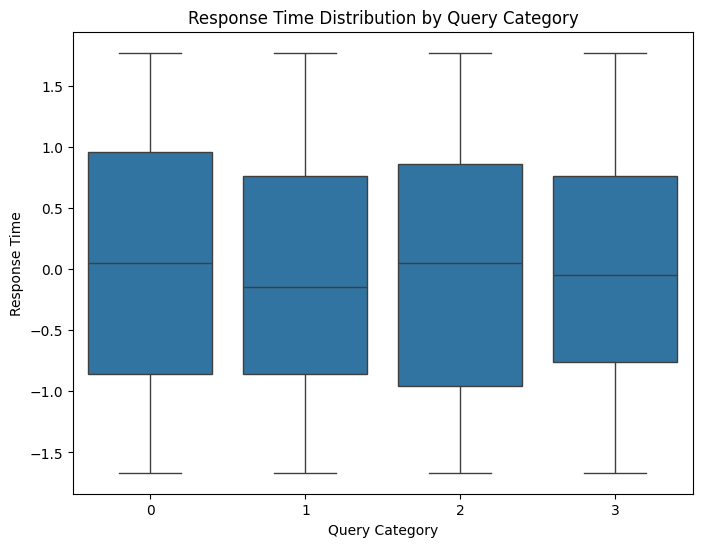

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Query_Category", y="Response_Time", data=df)
plt.title("Response Time Distribution by Query Category")
plt.xlabel("Query Category")
plt.ylabel("Response Time")
plt.show()

#### Word Cloud for Query Texts

#### What is a Word Cloud?

A word cloud is a visual representation of text data where the size of each word indicates how often it appears in the dataset. The more frequently a word is used, the larger and bolder it appears in the cloud. Word clouds help quickly highlight the most common topics or keywords in a collection of text, making it easy to spot trends and important terms at a glance.

#### What is `imshow`?

`imshow` is a function in Matplotlib used to display images or 2D data as a color-coded grid. It is commonly used to visualize matrices, heatmaps, or image data.

- **How it works:** Each value in the 2D array is shown as a colored square (pixel).
- **Typical uses:** Displaying images, correlation matrices, confusion matrices, or word clouds.

**Key Points:**
- `imshow` is great for visualizing 2D data.
- You can change the color map using the `cmap` parameter.
- Add `plt.colorbar()` to show the color scale.

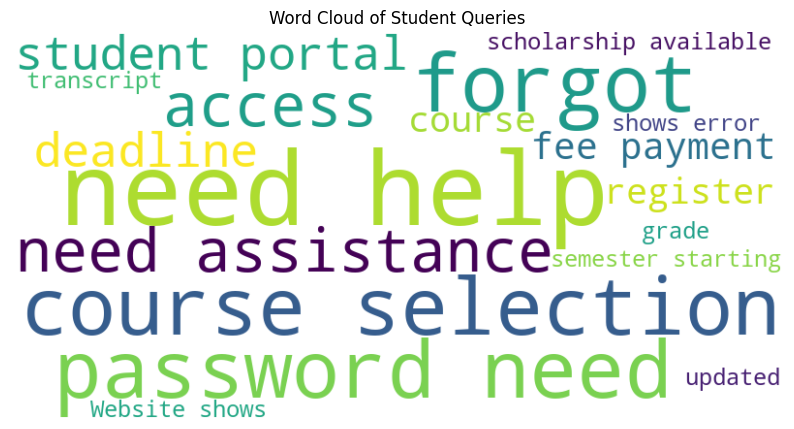

In [89]:
query_texts = " ".join(df["Query_Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(query_texts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Student Queries")
plt.show()

### Supervised Learning

#### Display dataset

In [90]:
stu_query.head()  # Display the first few rows of the dataset

,Query_ID,Timestamp,Student_ID,Query_Text,Query_Category,Satisfaction_Score,Response_Time,Resolved_Flag
0,1,01-04-2025 09:05,STU10567,What is the deadline for fee payment?,3,1.033198,-0.958097,0
1,2,01-04-2025 09:10,STU10568,How can I get a transcript?,1,-0.166601,-1.665603,0
2,3,01-04-2025 09:15,STU10569,I need help with course selection.,1,0.690398,-0.452736,1
3,4,01-04-2025 09:20,STU10570,How can I get a transcript?,1,-0.509400,1.366564,1
4,5,01-04-2025 09:25,STU10571,My grade has not been updated.,0,1.375997,1.770853,0


#### Classification: Predicting Query Category

#### What is Classification?

Classification is a type of supervised machine learning task where the goal is to predict a category or label for new data based on patterns learned from labeled examples. For example, in this project, we use classification to automatically assign each student query to a specific category (like Academic, Technical, Financial, or General).

**Key Points:**
- The model learns from historical data with known categories.
- It predicts the most likely category for new, unseen queries.
- Common algorithms include Random Forest, Decision Trees, and Logistic Regression.

**Typical Use Cases:**
- Email spam detection (spam or not spam)
- Medical diagnosis (disease type)
- Customer segmentation (grouping by behavior)

#### What is a Heatmap?

A heatmap is a graphical representation of data where individual values are shown as colors in a matrix. It is commonly used to visualize the relationship between two variables or to display the frequency of values in a table.

- **Rows and columns:** Represent different categories or variables.
- **Colors:** Indicate the magnitude or frequency of the values (e.g., darker colors for higher values).

Heatmaps are especially useful for visualizing correlation matrices, confusion matrices, or any data where patterns and trends can be spotted through color intensity.

Classification Accuracy: 0.22666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.12      0.14        74
           1       0.24      0.27      0.26        81
           2       0.23      0.32      0.26        60
           3       0.26      0.21      0.23        85

    accuracy                           0.23       300
   macro avg       0.22      0.23      0.22       300
weighted avg       0.22      0.23      0.22       300



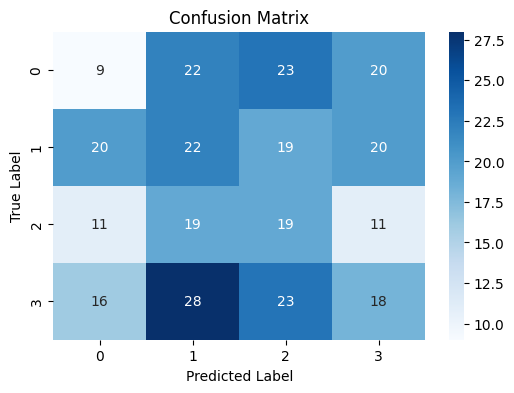

In [91]:
# Prepare data
X_clf = df[["Response_Time", "Satisfaction_Score"]]
y_clf = df["Query_Category"]

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Regression: Predicting Response Time

#### What is Regression?

Regression is a supervised machine learning technique used to predict a continuous numerical value based on input features. For example, in this project, regression is used to estimate the response time for student queries based on satisfaction scores and other factors.

**Key Points:**
- Predicts a number (not a category).
- Helps understand relationships between variables.
- Common algorithms: Linear Regression, Decision Tree Regression.

**Typical Use Cases:**
- Predicting house prices
- Estimating delivery times
- Forecasting sales


------


### Common Regression Metrics

- **MAE (Mean Absolute Error):**  
    Measures the average absolute difference between actual and predicted values.  
    Formula:  
    $$
    \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
    $$
    **Use:** Easy to interpret; shows average error in the same units as the target.

- **MSE (Mean Squared Error):**  
    Measures the average of the squared differences between actual and predicted values.  
    Formula:  
    $$
    \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
    $$
    **Use:** Penalizes larger errors more than MAE.

- **RMSE (Root Mean Squared Error):**  
    The square root of MSE; brings error back to original units.  
    Formula:  
    $$
    \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
    $$
    **Use:** Commonly used; easier to interpret than MSE.

- **$R^2$ (R-Squared Score):**  
    Indicates how well the model explains the variance in the data (ranges from 0 to 1; can be negative if the model is very poor).  
    Formula:  
    $$
    R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
    $$
    **Use:** Shows the proportion of variance explained by the model; higher is better.

In [92]:
# Train Linear Regression
reg = LinearRegression()

In [93]:
# Prepare data
X_reg = df[["Satisfaction_Score"]]
y_reg = df["Response_Time"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

# Model Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared Score (R²):", r2)

Mean Absolute Error (MAE): 0.8607959001754747
Mean Squared Error (MSE): 1.0277562442378898
Root Mean Squared Error (RMSE): 1.013783134717623
R-Squared Score (R²): -0.0011349408165410857


#### Interactive Scatter Plot for Actual vs. Predicted

#### What is a Scatter Plot?

A scatter plot is a type of graph that displays individual data points as dots on a two-dimensional grid. Each dot represents a pair of values—one on the x-axis and one on the y-axis. Scatter plots are useful for showing the relationship or correlation between two numerical variables.

- **X-axis:** Represents one variable (e.g., actual values).
- **Y-axis:** Represents another variable (e.g., predicted values).
- **Dots:** Each dot shows a single observation.

Scatter plots help you see patterns, trends, and possible outliers in your data. If the dots form a line or curve, it suggests a relationship between the variables.

In [94]:
# Interactive Scatter Plot for Actual vs. Predicted
fig = px.scatter(x=y_test_reg, y=y_pred_reg, title="Actual vs. Predicted Response Time", labels={"x": "Actual Response Time", "y": "Predicted Response Time"})
fig.add_shape(type="line", x0=y_test_reg.min(), y0=y_test_reg.min(), x1=y_test_reg.max(), y1=y_test_reg.max(), line=dict(dash="dash", color="red"))
fig.show()

### Unsupervised Learning

#### Finding Optimal Clusters Using the Elbow Method

#### What is the "Optimal Cluster" in Clustering?

The "optimal cluster" refers to the best number of groups (clusters) to divide your data into when using clustering algorithms like K-Means. Choosing the right number of clusters helps you find meaningful patterns without overcomplicating the results.

- **Why is it important?**  
    Too few clusters may mix different types of data together, while too many clusters can split similar data unnecessarily.
- **How do we find it?**  
    The "elbow method" is a common technique: plot the number of clusters against a measure called WCSS (Within-Cluster Sum of Squares). The point where the decrease in WCSS slows down (forms an "elbow" shape) is usually the optimal number of clusters.

**In summary:**  
Finding the optimal cluster helps you group your data in a way that makes the most sense for analysis and interpretation.

In [95]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[["Response_Time", "Satisfaction_Score"]])
    wcss.append(kmeans.inertia_)

fig = px.line(x=list(range(1, 11)), y=wcss, title="Elbow Method for Optimal Clusters", labels={"x": "Number of Clusters", "y": "WCSS"})
fig.show()

#### Apply K-Means Clustering

### What is K-Means Clustering?

K-Means is an unsupervised machine learning algorithm used to group similar data points into clusters. It works by:

1. Choosing a number of clusters (K).
2. Randomly assigning data points to K clusters.
3. Calculating the center (centroid) of each cluster.
4. Reassigning each data point to the nearest centroid.
5. Repeating steps 3 and 4 until the clusters no longer change.

**Key Points:**
- K-Means helps find patterns and groupings in data without using labels.
- The "elbow method" is often used to choose the best number of clusters.
- Useful for customer segmentation, grouping similar queries, and pattern discovery.

In [96]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Response_Time", "Satisfaction_Score"]])

# Interactive Scatter Plot for Clusters
fig = px.scatter(df, x="Response_Time", y="Satisfaction_Score", color="Cluster", title="Clusters of Queries", labels={"Response_Time": "Response Time", "Satisfaction_Score": "Satisfaction Score", "Cluster": "Cluster"})
fig.show()

### Model Interpretability using Plotly and LIME

### What is Model Interpretability?

Model interpretability is the process of understanding and explaining how a machine learning model makes its predictions. It helps us answer questions like:

- **Why did the model make this prediction?**
- **Which features (inputs) were most important for the decision?**
- **Can we trust the model’s results?**

Interpretability is especially important in real-world applications where transparency, fairness, and trust are needed. Tools like LIME and interactive visualizations (e.g., with Plotly) help us see which factors influenced a specific prediction, making complex models easier to understand for everyone.

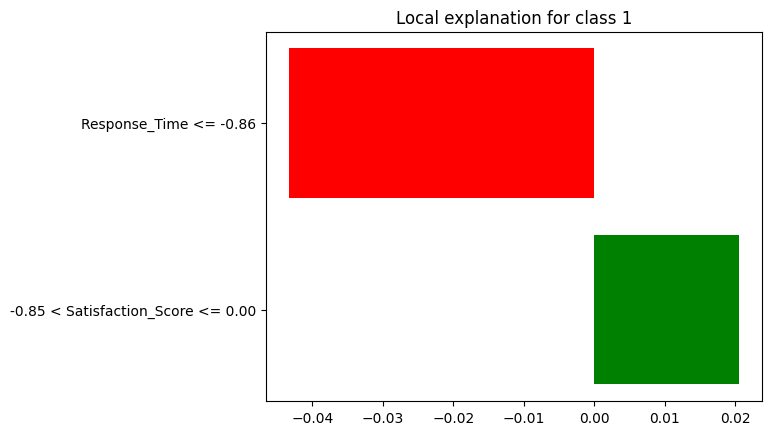

Models saved successfully!


In [97]:
# Model Interpretability with LIME
explainer = LimeTabularExplainer(
	training_data=X_train.values,
	feature_names=X_train.columns,
	class_names=[str(c) for c in np.unique(y_train)],
	mode="classification"
)
# Select a test instance to explain
instance = X_test.iloc[0]

exp = explainer.explain_instance(instance.values, clf.predict_proba, num_features=2)
fig = exp.as_pyplot_figure()
plt.show()  # Ensures the plot is displayed only once

# Save the models
import joblib
joblib.dump(clf, "random_forest_model.pkl")
joblib.dump(reg, "linear_regression_model.pkl")
print("Models saved successfully!")

### What is RandomForestClassifier?

`RandomForestClassifier` is a machine learning algorithm used for classification tasks. It works by building multiple decision trees and combining their results to make more accurate and stable predictions. Each tree is trained on a random subset of the data, and the final prediction is made by taking a majority vote from all the trees.

**Key Points:**
- Handles both numerical and categorical data.
- Reduces overfitting compared to a single decision tree.
- Works well with large datasets and many features.
- Provides feature importance scores.

**Typical Use Cases:**
- Email spam detection
- Medical diagnosis
- Customer segmentation

In [98]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # classes: 0, 1, 2

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new RandomForestClassifier on the Iris dataset
clf_iris = RandomForestClassifier(n_estimators=100, random_state=42)
clf_iris.fit(X_train, y_train)

# Ensure predict_proba returns proper output
def modified_predict_proba(X_input):
    proba = clf_iris.predict_proba(X_input)
    if proba.shape[1] == 1:  # Handle single-class probability output
        proba = np.hstack([proba, 1 - proba])
    return proba

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=list(X_train.columns),
    class_names=["Category_" + str(cls) for cls in np.unique(y_train)],
    mode='classification'
)

# Pick an instance to explain (for example, instance at index 5)
i = 5
instance = X_test.iloc[i].values  # 1-d array representing a single instance

print("Instance to Explain:", instance)

# Generate the explanation using our modified_predict_proba function
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=modified_predict_proba,
    num_features=4
)
# Print textual explanation
print(exp.as_list())


Instance to Explain: [5.4 3.4 1.5 0.4]
[('petal length (cm) <= 1.50', -0.20033855125104058), ('0.30 < petal width (cm) <= 1.30', 0.17091361707493308), ('3.00 < sepal width (cm) <= 3.40', 0.028305737313978944), ('5.10 < sepal length (cm) <= 5.75', 0.021277995184908638)]


### Interactive Query Prediction

This section allows users to input their own student queries and instantly receive predictions about the query category, response flag, and estimated response time. By leveraging the trained machine learning model, the system provides real-time feedback and demonstrates how automated query classification can enhance student support services. Simply enter a sample query to see the model in action!

In [100]:
stu_query

,Query_ID,Timestamp,Student_ID,Query_Text,Query_Category,Satisfaction_Score,Response_Time,Resolved_Flag,Cluster
0,1,01-04-2025 09:05,STU10567,What is the deadline for fee payment?,3,1.033198,-0.958097,0,2
1,2,01-04-2025 09:10,STU10568,How can I get a transcript?,1,-0.166601,-1.665603,0,0
2,3,01-04-2025 09:15,STU10569,I need help with course selection.,1,0.690398,-0.452736,1,2
3,4,01-04-2025 09:20,STU10570,How can I get a transcript?,1,-0.509400,1.366564,1,1
4,5,01-04-2025 09:25,STU10571,My grade has not been updated.,0,1.375997,1.770853,0,1
...,...,...,...,...,...,...,...,...,...
1495,1496,06-04-2025 13:40,STU12062,"I forgot my password, need assistance.",2,-1.023599,0.254769,0,0
1496,1497,06-04-2025 13:45,STU12063,When is the semester starting?,1,-1.023599,0.962275,1,1
1497,1498,06-04-2025 13:50,STU12064,Website shows error 404.,2,-1.023599,0.052625,0,0
1498,1499,06-04-2025 13:55,STU12065,How can I get a transcript?,0,1.547397,0.456914,0,2


#### Below are sample queries that are ***present*** in the **dataset**. You can use these to test the model:

- What is the deadline for fee payment?
- How can I get a transcript?
- I need help with course selection.
- My grade has not been updated.
- How do I register for courses?
- When is the semester starting?
- I cannot access my student portal.
- Is there any scholarship available?
- Website shows error 404.
- I forgot my password, need assistance.

***Feel free to use these queries to evaluate the prediction and classification capabilities of the model.*** 
```

In [101]:
import time  # For response time calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd  # To handle query_data.csv

# Define Category Mapping
category_mapping = {
    0: "Academic",
    1: "General",
    2: "Technical",
    3: "Financial"
}

# Load Data from query_data.csv
try:
    query_data = pd.read_csv("query_data.csv")  # Ensure the CSV contains columns 'Query_Text', 'Response_Flag'
except FileNotFoundError:
    print("Error: query_data.csv file not found. Proceeding with example data.")
    query_data = pd.DataFrame({
        "Query_Text": ["I need help with my course syllabus", "What are the library timings?", 
                       "Website shows error 404", "What are the fees for admission?"],
        "Response_Flag": ["Yes", "Yes", "No", "Yes"]
    })

# Handle missing Response_Flag column
if "Response_Flag" not in query_data.columns:
    print("Response_Flag column found. Adding values.")
    query_data["Response_Flag"] = ["Yes"] * len(query_data)  # Add default values

# Training Data
training_texts = query_data["Query_Text"].values.tolist()

# Generate labels that match the number of queries
training_labels = [0, 1, 2, 3] * (len(training_texts) // 4)  # Repeat labels
training_labels = training_labels[:len(training_texts)]  # Ensure labels match the number of samples

# Initialize and Train the Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(training_texts)  # Train the vectorizer on training text

# Transform Training Data
text_features = vectorizer.transform(training_texts).toarray()
satisfaction_scores = np.array([4.0] * len(training_texts)).reshape(-1, 1)  # Simulate satisfaction scores
training_features = np.hstack((satisfaction_scores, text_features))  # Combine features

# Check dimensions and assert correctness
print("Shape of training features (X):", training_features.shape)
print("Length of training labels (y):", len(training_labels))
assert training_features.shape[0] == len(training_labels), "Mismatch between features and labels!"

X_train, X_test, y_train, y_test = train_test_split(training_features, training_labels, test_size=0.2, random_state=42)

# Retrain the classifier on the new features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the Classifier
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict Query Category
def predict_query():
    query_text = input("\nEnter your student query: ")  # Get query input from user
    satisfaction_score = np.array([4.0]).reshape(1, -1)  # Example score reshaped properly
    query_text_feature = vectorizer.transform([query_text]).toarray()  # Vectorize input query
    query_data_clf = np.hstack((satisfaction_score, query_text_feature))  # Combine features for prediction

    # Simulate response time calculation
    start_time = time.time()
    predicted_category = clf.predict(query_data_clf)[0]  # Predict category
    end_time = time.time()
    response_time = end_time - start_time  # Calculate response time

    # Use Category Mapping
    category_name = category_mapping.get(predicted_category, "Unknown")
    response_flag = query_data[query_data["Query_Text"].str.lower() == query_text.lower()]["Response_Flag"].values
    response_flag = response_flag[0] if len(response_flag) > 0 else "No"  # Default to "No" if no match

    # Output Results
    print("\n🔍 Prediction Result:")
    print(f"Query: {query_text}")
    print(f"Predicted Category: {category_name}")
    print(f"Response Flag: {response_flag}")
    print(f"Response Time: {response_time:.2f} seconds")

# Call the prediction function
predict_query()

Response_Flag column found. Adding values.
Shape of training features (X): (1500, 44)
Length of training labels (y): 1500
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.22      0.27        79
           1       0.22      0.21      0.21        73
           2       0.36      0.27      0.30        79
           3       0.24      0.43      0.31        69

    accuracy                           0.28       300
   macro avg       0.29      0.28      0.27       300
weighted avg       0.29      0.28      0.27       300

Confusion Matrix:
[[17 18 17 27]
 [15 15 11 32]
 [ 6 17 21 35]
 [11 18 10 30]]

🔍 Prediction Result:
Query: What is the deadline for fee payment?
Predicted Category: Financial
Response Flag: Yes
Response Time: 0.02 seconds
